# Classification Project : 
### Predicting eleigable employee for promotion using multinational corporation HR data

*** ***

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score, f1_score 
from sklearn import metrics


In [62]:
from sklearn import linear_model, neighbors, ensemble

In [63]:
from sklearn.metrics import f1_score, roc_auc_score

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
df = pd.read_csv('HR.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [6]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [7]:
df.drop(columns=['recruitment_channel','region','gender','employee_id'],inplace=True)
df

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,1,35,5.0,8,0,49,0
1,Operations,Bachelor's,1,30,5.0,4,0,60,0
2,Sales & Marketing,Bachelor's,1,34,3.0,7,0,50,0
3,Sales & Marketing,Bachelor's,2,39,1.0,10,0,50,0
4,Technology,Bachelor's,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...
54803,Technology,Bachelor's,1,48,3.0,17,0,78,0
54804,Operations,Master's & above,1,37,2.0,6,0,56,0
54805,Analytics,Bachelor's,1,27,5.0,3,0,79,0
54806,Sales & Marketing,NaN,1,29,1.0,2,0,45,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             52399 non-null  object 
 2   no_of_trainings       54808 non-null  int64  
 3   age                   54808 non-null  int64  
 4   previous_year_rating  50684 non-null  float64
 5   length_of_service     54808 non-null  int64  
 6   awards_won?           54808 non-null  int64  
 7   avg_training_score    54808 non-null  int64  
 8   is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 3.8+ MB


In [9]:
df.isna().any()

department              False
education                True
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [10]:
df.isna().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
#drop null values
df.dropna(subset=['education'],inplace=True)

In [12]:
df['previous_year_rating'].fillna(value=df['previous_year_rating'].mean(), inplace=True)

In [13]:
df.isna().sum()

department              0
education               0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [14]:
#Identify duplicates records in the data
dupes=df.duplicated()
sum(dupes)

9918

In [15]:
#Remove Duplicate fro the dataset
df.drop_duplicates(keep=False,inplace=True) 

In [16]:
#Identify duplicates records in the data
dupes=df.duplicated()
sum(dupes)

0

In [17]:
df.shape

(36219, 9)

In [18]:
print("Number of Not promoted ",len(df[df["is_promoted"]==0]))
print("Number of promoted",len(df[df["is_promoted"]==1]))

Number of Not promoted  31871
Number of promoted 4348


Text(0, 0.5, 'Number of is promoted')

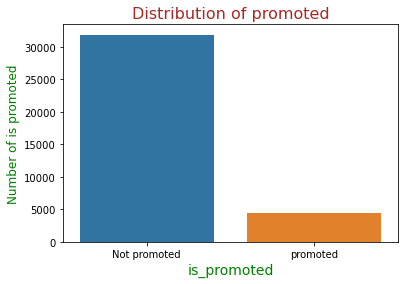

In [19]:
#visualize the imbalance with a bar chart
plt.title('Distribution of promoted', fontdict={'size' : 16, 'color':'brown'})
sns.countplot(x='is_promoted', data=df)
labels = ['Not promoted', 'promoted']   #to label the plot
vals = [0, 1]   #to put the labels right
plt.xticks(vals, labels)
plt.xlabel('is_promoted', fontdict={'size' : 14, 'color' : 'green'})
plt.ylabel('Number of is promoted', fontdict={'size' : 12, 'color':'green'})

In [20]:
print("Not promoted is ",len(df[df["is_promoted"]==0])/len(df),'of data')
print("Promoted is",len(df[df["is_promoted"]==1])/len(df),'of data')

Not promoted is  0.8799525111129518 of data
Promoted is 0.12004748888704823 of data


In [21]:
print('Proportion of the classes in the data:')
print(df['is_promoted'].value_counts() / len(df))

Proportion of the classes in the data:
0    0.879953
1    0.120047
Name: is_promoted, dtype: float64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36219 entries, 3 to 54807
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            36219 non-null  object 
 1   education             36219 non-null  object 
 2   no_of_trainings       36219 non-null  int64  
 3   age                   36219 non-null  int64  
 4   previous_year_rating  36219 non-null  float64
 5   length_of_service     36219 non-null  int64  
 6   awards_won?           36219 non-null  int64  
 7   avg_training_score    36219 non-null  int64  
 8   is_promoted           36219 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 3.8+ MB


### Data Preproccessing:

### 1) Feature Engineering
###### Dummy variables

In [23]:
data = df.copy()
data_dep = pd.get_dummies(data['department'], drop_first=True)
data_dummy = pd.concat([data, data_dep], axis=1)
data_dummy.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
3,Sales & Marketing,Bachelor's,2,39,1.0,10,0,50,0,0,0,0,0,0,0,1,0
4,Technology,Bachelor's,1,45,3.0,2,0,73,0,0,0,0,0,0,0,0,1
5,Analytics,Bachelor's,2,31,3.0,7,0,85,0,0,0,0,0,0,0,0,0
7,Operations,Master's & above,1,33,3.0,6,0,63,0,0,0,0,1,0,0,0,0
9,Sales & Marketing,Master's & above,1,32,5.0,5,0,54,0,0,0,0,0,0,0,1,0


In [24]:
data_edu = pd.get_dummies(data['education'], drop_first=True)
df_dummy = pd.concat([data_dummy, data_edu], axis=1)
df_dummy.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above
3,Sales & Marketing,Bachelor's,2,39,1.0,10,0,50,0,0,0,0,0,0,0,1,0,0,0
4,Technology,Bachelor's,1,45,3.0,2,0,73,0,0,0,0,0,0,0,0,1,0,0
5,Analytics,Bachelor's,2,31,3.0,7,0,85,0,0,0,0,0,0,0,0,0,0,0
7,Operations,Master's & above,1,33,3.0,6,0,63,0,0,0,0,1,0,0,0,0,0,1
9,Sales & Marketing,Master's & above,1,32,5.0,5,0,54,0,0,0,0,0,0,0,1,0,0,1


In [25]:
df_dummy.drop(columns=['department','education'],inplace=True)
df_dummy

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above
3,2,39,1.0,10,0,50,0,0,0,0,0,0,0,1,0,0,0
4,1,45,3.0,2,0,73,0,0,0,0,0,0,0,0,1,0,0
5,2,31,3.0,7,0,85,0,0,0,0,0,0,0,0,0,0,0
7,1,33,3.0,6,0,63,0,0,0,0,1,0,0,0,0,0,1
9,1,32,5.0,5,0,54,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,2,31,1.0,2,0,49,0,0,0,0,0,0,0,1,0,0,0
54803,1,48,3.0,17,0,78,0,0,0,0,0,0,0,0,1,0,0
54804,1,37,2.0,6,0,56,0,0,0,0,1,0,0,0,0,0,1
54805,1,27,5.0,3,0,79,0,0,0,0,0,0,0,0,0,0,0


### EDA


<AxesSubplot:>

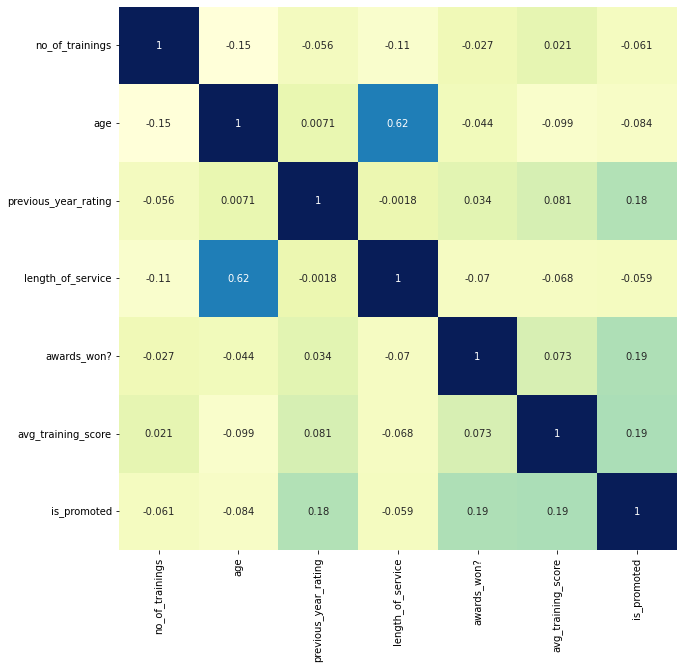

In [26]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),cbar=False, annot=True, cmap="YlGnBu")

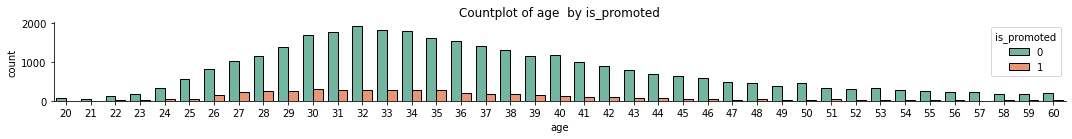

In [27]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[15,20])

fft=["age"]                   
n=1
for f in fft:
    plt.subplot(12,1,n)
    sns.countplot(x=f, hue='is_promoted',edgecolor="black", palette = "Set2", data=df)
    sns.despine()
    plt.title("Countplot of {}  by is_promoted".format(f))
    n=n+1
plt.tight_layout()
plt.show()

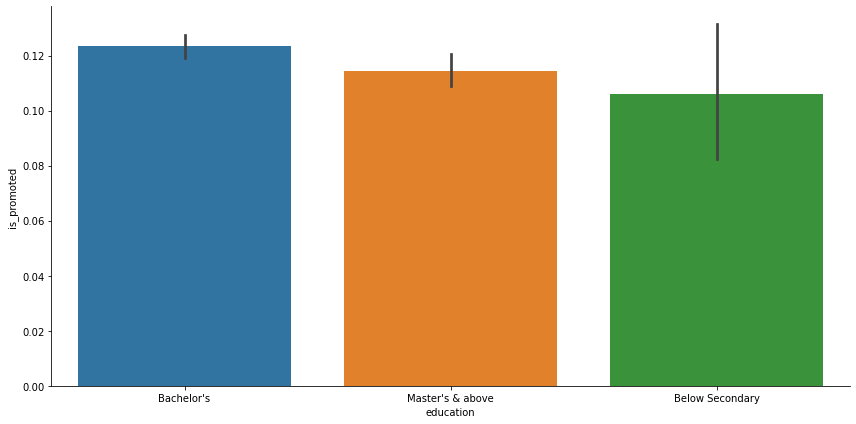

In [28]:
sns.catplot(x="education", y="is_promoted", kind="bar", data=df, height=6, aspect=2)

In [29]:
df

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
3,Sales & Marketing,Bachelor's,2,39,1.0,10,0,50,0
4,Technology,Bachelor's,1,45,3.0,2,0,73,0
5,Analytics,Bachelor's,2,31,3.0,7,0,85,0
7,Operations,Master's & above,1,33,3.0,6,0,63,0
9,Sales & Marketing,Master's & above,1,32,5.0,5,0,54,0
...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,Bachelor's,2,31,1.0,2,0,49,0
54803,Technology,Bachelor's,1,48,3.0,17,0,78,0
54804,Operations,Master's & above,1,37,2.0,6,0,56,0
54805,Analytics,Bachelor's,1,27,5.0,3,0,79,0


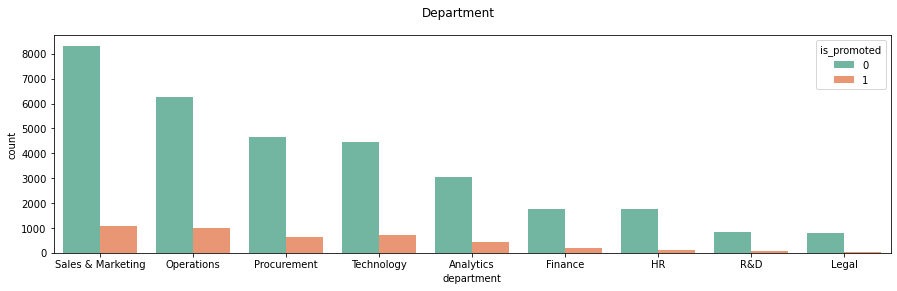

In [30]:
plt.figure(figsize=(15,4))
ax = sns.countplot(x="department",data=df, palette = "Set2",hue="is_promoted", order = df['department'].value_counts().index)
ax.grid(False)
plt.suptitle("Department")
plt.show()

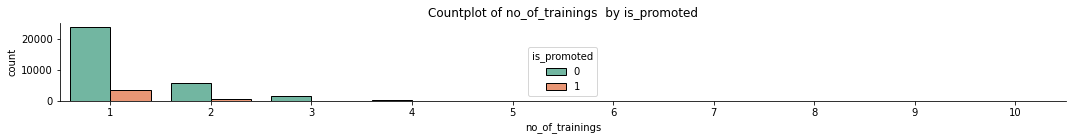

In [31]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[15,20])

fft=["no_of_trainings"]                   
n=1
for f in fft:
    plt.subplot(12,1,n)
    sns.countplot(x=f, hue='is_promoted', edgecolor="black",palette = "Set2", data=df)
    sns.despine()
    plt.title("Countplot of {}  by is_promoted".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# Exploring algorithms:
## KNN

In [32]:
X = df_dummy.drop('is_promoted',axis = 1)
y = df_dummy.is_promoted
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=42,stratify=y)

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_pred_knn = knn.predict(X_test)
#confusion matrix on KNN
cf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
print(cf_matrix)
#accuracy on KNN
accuracy = metrics.accuracy_score(y_test,y_pred_knn)
print ('KNN Accuracy = ', accuracy * 100)
#precision on KNN
Precision = metrics.precision_score(y_test,y_pred_knn)
print ('KNN Precision = ', Precision*100)
#Recall on KNN
Recall = metrics.recall_score(y_test,y_pred_knn)
print ('KNN Recall = ', Recall*100)
#F1 score on KNN
f1_score = metrics.f1_score(y_test,y_pred_knn)
print ('KNN F1 score= ',f1_score * 100)

[[9256  306]
 [1001  303]]
KNN Accuracy =  87.9716547027425
KNN Precision =  49.75369458128079
KNN Recall =  23.236196319018404
KNN F1 score=  31.677992681651858


In [35]:
#Importing
from sklearn.model_selection import cross_val_score
#create a new KNN model
KNN_CV = KNeighborsClassifier(n_neighbors=3)
#train model with CV of 5 
cv_scores = cross_val_score(KNN_CV, X, y, cv=5)
#print each CV score (accuracy) and find the average
print('The scores are:', cv_scores)
print(f'The mean score is {np.mean(cv_scores)}')
print(f'The F1 score is {f1_score}')


The scores are: [0.8816952  0.87727775 0.87838211 0.87838211 0.87905564]
The mean score is 0.8789585603434548
The F1 score is 0.31677992681651856


In [36]:
#importing
from sklearn.model_selection import GridSearchCV
# Create a new KNN model
KNN_2 = KNeighborsClassifier()
# Create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 20)}
# use gridsearch to test all values for n_neighbors
KNN_gscv = GridSearchCV(KNN_2, param_grid, cv=5)

#fit model to data
KNN_gscv.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [37]:
KNN_gscv.best_params_

{'n_neighbors': 11}

In [38]:
KNN_gscv.best_score_

0.8932604743451531

In [39]:
y_pred_knn2 = KNN_gscv.predict(X_test)
#confusion matrix on grid KNN
cf_matrix = metrics.confusion_matrix(y_test, y_pred_knn2)
print(cf_matrix)
#F1 score on grid KNN
f1_score = metrics.f1_score(y_test,y_pred_knn2)
print ('KNN F1 score= ',f1_score * 100)

[[9533   29]
 [1055  249]]
KNN F1 score=  31.479140328697852


In [40]:
#KNN_gscv.scoring(y,y_pred_knn2)

In [41]:
#y_pred_knn2 = KNN_gscv.predict(X)
#f1_score = metrics.f1_score(y_test,y_pred_knn2)
#print ('KNN F1 score= ',f1_score * 100)



## Logistic Regression

In [42]:
Log_Reg = LogisticRegression()
Log_Reg.fit(X_train, y_train)

C:\Users\banon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred_Log_Reg = Log_Reg.predict(X_test)
#confusion matrix on LR
cf_matrix = metrics.confusion_matrix(y_test, y_pred_Log_Reg)
print(cf_matrix)
#accuracy on LR
accuracy = metrics.accuracy_score(y_test,y_pred_Log_Reg)
print ('Logistic Regression Accuracy = ', accuracy * 100)
#precision on LR
Precision = metrics.precision_score(y_test,y_pred_Log_Reg)
print ('Logistic Regression Precision = ', Precision*100)
#Recall on LR
Recall = metrics.recall_score(y_test,y_pred_Log_Reg)
print ('Logistic Regression Recall = ', Recall*100)
#F1 score on LR
f1_score = metrics.f1_score(y_test,y_pred_Log_Reg)
print ('Logistic Regression F1 score= ',f1_score * 100)

[[9472   90]
 [1110  194]]
Logistic Regression Accuracy =  88.95637769188293
Logistic Regression Precision =  68.30985915492957
Logistic Regression Recall =  14.877300613496933
Logistic Regression F1 score=  24.43324937027708


## Decision Tree

In [44]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred_dtree = dtree.predict(X_test)
#confusion matrix on DT
cf_matrix = metrics.confusion_matrix(y_test, y_pred_dtree)
print(cf_matrix)
#accuracy on DT
accuracy = metrics.accuracy_score(y_test,y_pred_dtree)
print ('Decision Tree Accuracy = ', accuracy * 100)
#precision on DT
Precision = metrics.precision_score(y_test,y_pred_dtree)
print ('Decision Tree Precision = ', Precision*100)
#Recall on DT
Recall = metrics.recall_score(y_test,y_pred_dtree)
print ('Decision Tree Recall = ', Recall*100)
#F1 score on DT
f1_score = metrics.f1_score(y_test,y_pred_dtree)
print ('Decision Tree F1 score= ',f1_score * 100)

[[8623  939]
 [ 771  533]]
Decision Tree Accuracy =  84.26283821093318
Decision Tree Precision =  36.20923913043478
Decision Tree Recall =  40.87423312883436
Decision Tree F1 score=  38.400576368876074


## Random Forest

In [46]:
rf = RandomForestClassifier(n_estimators= 500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [47]:
y_pred_rf = rf.predict(X_test)
#confusion matrix on RF
cf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
print(cf_matrix)
#accuracy on RF
accuracy = metrics.accuracy_score(y_test,y_pred_rf)
print ('Random Forest Accuracy = ', accuracy * 100)
#precision on RF
Precision = metrics.precision_score(y_test,y_pred_rf)
print ('Random Forest Precision = ', Precision*100)
#Recall on RF
Recall = metrics.recall_score(y_test,y_pred_rf)
print ('Random Forest Recall = ', Recall*100)
#F1 score on RF
f1_score = metrics.f1_score(y_test,y_pred_rf)
print ('Random Forest F1 score= ',f1_score * 100)

[[9309  253]
 [ 831  473]]
Random Forest Accuracy =  90.02392784833425
Random Forest Precision =  65.15151515151516
Random Forest Recall =  36.27300613496933
Random Forest F1 score=  46.60098522167488


## Data Imbalance technique:
### Standardize data

In [48]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

### SMOTE:

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 123)

In [51]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

In [52]:
len(X_train_new), len(y_train_new)

(42706, 42706)

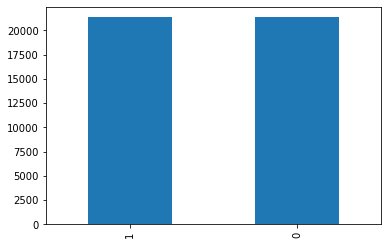

In [53]:
pd.Series(y_train_new).value_counts().plot.bar();

Text(0, 0.5, 'Number of is promoted')

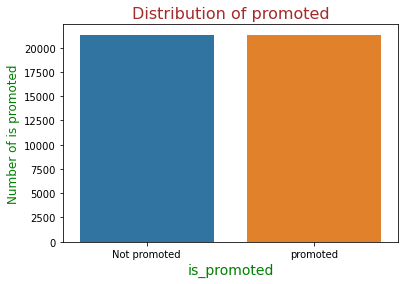

In [54]:
#visualize the imbalance with a bar chart
plt.title('Distribution of promoted', fontdict={'size' : 16, 'color':'brown'})
sns.countplot(x=y_train_new, data=df)
labels = ['Not promoted', 'promoted']   #to label the plot
vals = [0, 1]   #to put the labels right
plt.xticks(vals, labels)
plt.xlabel('is_promoted', fontdict={'size' : 14, 'color' : 'green'})
plt.ylabel('Number of is promoted', fontdict={'size' : 12, 'color':'green'})

### 1. Logistic Regression after SMOTE:

In [55]:
clf = LogisticRegression(solver = 'lbfgs')
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [56]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.7287968903666932
Accuracy score for Testing Dataset =  0.7498535932401907


In [57]:
print('Confusion Matrix - Training Dataset')
#lr_matrix =pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = False)
#print(lr_matrix)                    
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          16268   5085  21353
1           6497  14856  21353
All        22765  19941  42706


In [58]:
#F1 score on LR after SMOTE
f1_score = metrics.f1_score(y_test,test_pred_sm)
print ('Logistic regression F1 score= ',f1_score * 100)

Logistic regression F1 score=  38.729508196721305


In [59]:
AUC_lr=roc_auc_score(y_test,test_pred_sm)
AUC_lr

0.7104244060124572

In [65]:
#LR with resampling data using class weight

lr_weight = LogisticRegression(solver='liblinear') 
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_4x = LogisticRegression(class_weight={0 : 1, 1 : 9}, solver='liblinear')

lr_weight.fit(X_train_new, y_train_new)
print('Normal Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_weight.predict(X_test)), roc_auc_score(y_test, lr_weight.predict_proba(X_test)[:,1])))

lr_balanced.fit(X_train_new, y_train_new)
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_balanced.predict(X_test)), roc_auc_score(y_test, lr_balanced.predict_proba(X_test)[:,1])))

lr_4x.fit(X_train_new, y_train_new)
print('9:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_4x.predict(X_test)), roc_auc_score(y_test, lr_4x.predict_proba(X_test)[:,1])))

Normal Logistic Regression Test F1: 0.387, Test AUC: 0.801
Balanced class weights Logistic Regression Test F1: 0.387, Test AUC: 0.801
9:1 class weights Logistic Regression Test F1: 0.235, Test AUC: 0.803


Logistic Regression Model best F1 score 0.489 at prob decision threshold >= 0.771


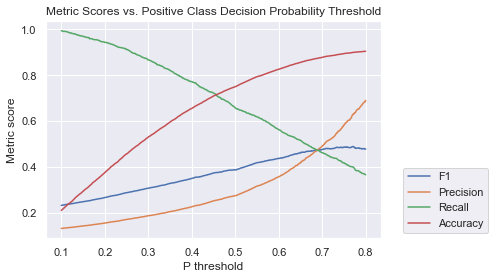

In [66]:
import imblearn.over_sampling

from sklearn.metrics import precision_score, recall_score, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

X_val, y_val = X_test, y_test

thresh_ps = np.linspace(.10,.80,1000)
model_val_probs = lr_weight.predict_proba(X_val)[:,1] # positive class probabilities 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

### 2. KNN after SMOTE:

In [67]:
knn_SMOTE = KNeighborsClassifier(n_neighbors = 3)
knn_SMOTE.fit(X_train_new, y_train_new)
train_pred_knn = knn_SMOTE.predict(X_train_new)
test_pred_knn = knn_SMOTE.predict(X_test)
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_knn, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_knn, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_knn, y_test))
f1_score = metrics.f1_score(y_test,test_pred_knn)
print ('KNN F1 score= ',f1_score * 100)

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          19090   2263  21353
1            455  20898  21353
All        19545  23161  42706
Accuracy score for Training Dataset =  0.9363555472298974
Accuracy score for Testing Dataset =  0.7746172508993558
KNN F1 score=  36.87910028116213


In [68]:
AUC_knn=roc_auc_score(y_test,test_pred_knn)
AUC_knn

0.6769541910234521

### Best KNN parameter:

In [69]:
knn_SMOTE2 = KNeighborsClassifier(n_neighbors = 7)
knn_SMOTE2.fit(X_train_new, y_train_new)
train_pred_knn2 = knn_SMOTE2.predict(X_train_new)
test_pred_knn2 = knn_SMOTE2.predict(X_test)
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_knn, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_knn2, y_train_new)*100)
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_knn2, y_test)*100)
f1_score = metrics.f1_score(y_test,test_pred_knn2)
print ('KNN F1 score= ',f1_score * 100)

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          19090   2263  21353
1            455  20898  21353
All        19545  23161  42706
Accuracy score for Training Dataset =  88.7978270032314
Accuracy score for Testing Dataset =  74.66744750271899
KNN F1 score=  36.67921371810958


In [70]:
AUC_knn2=roc_auc_score(y_test,test_pred_knn2)
AUC_knn2

0.688157152861562

In [71]:
dtree_SMOTE = DecisionTreeClassifier()
dtree_SMOTE.fit(X_train_new, y_train_new)

DecisionTreeClassifier()

In [72]:
y_pred_dtree = dtree_SMOTE.predict(X_test)
#confusion matrix on DT
cf_matrix = metrics.confusion_matrix(y_test, y_pred_dtree)
print(cf_matrix)
#accuracy on DT
accuracy = metrics.accuracy_score(y_test,y_pred_dtree)
print ('Decision Tree Accuracy = ', accuracy * 100)
#precision on DT
Precision = metrics.precision_score(y_test,y_pred_dtree)
print ('Decision Tree Precision = ', Precision*100)
#Recall on DT
Recall = metrics.recall_score(y_test,y_pred_dtree)
print ('Decision Tree Recall = ', Recall*100)
#F1 score on DT
f1_score = metrics.f1_score(y_test,y_pred_dtree)
print ('Decision Tree F1 score= ',f1_score * 100)

[[9341 1177]
 [ 871  564]]
Decision Tree Accuracy =  82.86622605203715
Decision Tree Precision =  32.39517518667432
Decision Tree Recall =  39.30313588850174
Decision Tree F1 score=  35.51637279596977


In [73]:
AUC_dtree_SMOTE=roc_auc_score(y_test,y_pred_dtree)
AUC_dtree_SMOTE

0.6405639775980515

In [74]:
rf_SMOTE = RandomForestClassifier(n_estimators= 500)
rf_SMOTE.fit(X_train_new, y_train_new)

RandomForestClassifier(n_estimators=500)

In [75]:
y_pred_rf = rf_SMOTE.predict(X_test)
#confusion matrix on RF
cf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
print(cf_matrix)
#accuracy on RF
accuracy = metrics.accuracy_score(y_test,y_pred_rf)
print ('Random Forest Accuracy = ', accuracy * 100)
#precision on RF
Precision = metrics.precision_score(y_test,y_pred_rf)
print ('Random Forest Precision = ', Precision*100)
#Recall on RF
Recall = metrics.recall_score(y_test,y_pred_rf)
print ('Random Forest Recall = ', Recall*100)
#F1 score on RF
f1_score = metrics.f1_score(y_test,y_pred_rf)
print ('Random Forest F1 score= ',f1_score * 100)

[[9953  565]
 [ 830  605]]
Random Forest Accuracy =  88.32928971806241
Random Forest Precision =  51.70940170940172
Random Forest Recall =  42.1602787456446
Random Forest F1 score=  46.449136276391556


In [76]:
AUC_rf_SMOTE=roc_auc_score(y_test,y_pred_rf)
AUC_rf_SMOTE

0.6839426753406969

### Ensemble Method

### 3. Adaboosting:

In [77]:
from sklearn import ensemble

ada_SMOTE= ensemble.AdaBoostClassifier()
ada_SMOTE.fit(X_train_new, y_train_new)

AdaBoostClassifier()

In [78]:
train_pred_ada = ada_SMOTE.predict(X_train_new)
test_pred_ada = ada_SMOTE.predict(X_test)
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_ada, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_ada, y_train_new)*100)
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_ada, y_test)*100)
f1_score = metrics.f1_score(y_test,test_pred_ada)
print ('AdaBoost F1 score= ',f1_score * 100)

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          15896   5457  21353
1           4183  17170  21353
All        20079  22627  42706
Accuracy score for Training Dataset =  77.42705942958835
Accuracy score for Testing Dataset =  73.5714883292897
AdaBoost F1 score=  38.14372429998041


In [79]:
AUC_ada=roc_auc_score(y_test,test_pred_ada)
AUC_ada

0.7111164998048806

### 4. Experimenting Stacking:

In [80]:
import os
import pickle

In [81]:
# instantiate 4 models
lr_model = linear_model.LogisticRegression(solver="lbfgs", random_state=1)
knn_model = neighbors.KNeighborsClassifier()
rf_model = ensemble.RandomForestClassifier(n_estimators=100, random_state=1)
et_model = ensemble.ExtraTreesClassifier(n_estimators=100, random_state=1)

models = ["lr_model", "knn_model", "rf_model", "et_model"]

In [82]:
#os.mkdir('models')

In [83]:
for model_name in models:
    
    curr_model = eval(model_name)
    
    curr_model.fit(X_train_new, y_train_new)
    
    with open(f"models/{model_name}.pickle", "wb") as pfile:
        pickle.dump(curr_model, pfile)

In [84]:
#pip install mlxtend

In [85]:
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!

sns.set_style("whitegrid")

In [86]:
model_names = ["lr_model", "knn_model", "rf_model", "et_model"]

for model_name in model_names:
    with open(f"models/{model_name}.pickle", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [87]:
model_vars

[LogisticRegression(random_state=1),
 KNeighborsClassifier(),
 RandomForestClassifier(random_state=1),
 ExtraTreesClassifier(random_state=1)]

In [88]:
model_list

[('lr_model', LogisticRegression(random_state=1)),
 ('knn_model', KNeighborsClassifier()),
 ('rf_model', RandomForestClassifier(random_state=1)),
 ('et_model', ExtraTreesClassifier(random_state=1))]

In [89]:

for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_test, y_test)*100}')
    y_pred_ensample = curr_model.predict(X_test)
    f1_score = metrics.f1_score(y_test,y_pred_ensample)
    print('F1 score: ',f1_score * 100)
    AUC_stac=roc_auc_score(y_test,y_pred_ensample)
    print('AUC: ',AUC_stac * 100)

lr_model score: 74.98535932401907
F1 score:  38.729508196721305
AUC:  71.04244060124572
knn_model score: 75.6044507654982
F1 score:  36.442894507410635
AUC:  68.11446844400805
rf_model score: 87.98627959508073
F1 score:  45.48215641609719
AUC:  68.01882685928156
et_model score: 87.23333054463315
F1 score:  45.028818443804035
AUC:  68.3733145700783


### 5. Gradiant Boosting

In [90]:
gb = GradientBoostingClassifier(n_estimators=24,
                               max_depth=3,
                               learning_rate=.71)
gb.fit(X_train_new, y_train_new)
y_pred = gb.predict(X_test)

In [91]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)
print(metrics.f1_score(y_test, y_pred))
AUC_gb=roc_auc_score(y_test, y_pred)
AUC_gb

[[9885  633]
 [ 804  631]]
0.46758058540200076


0.6897693550727375

### 6. Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
Gauss= GaussianNB()
Gauss.fit(X_train_new, y_train_new)
Gauss_pred = Gauss.predict(X_test)


In [94]:
print('Confusion Matrix ')
print(pd.crosstab(y_test, Gauss_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Accuracy score  = ', accuracy_score(y_test,Gauss_pred)*100)
f1_score = metrics.f1_score(y_test,Gauss_pred)
print ('AdaBoost F1 score= ',f1_score * 100)

Confusion Matrix 
Predicted     0     1    All
True                        
0          6210  4308  10518
1           399  1036   1435
All        6609  5344  11953
Accuracy score  =  60.62076466159123
AdaBoost F1 score=  30.564980085558346


In [95]:
AUC_Gauss=roc_auc_score(y_test,Gauss_pred)
AUC_Gauss

0.6561838242455442

### Comparing performance of all modules

In [96]:
from sklearn.metrics import roc_curve

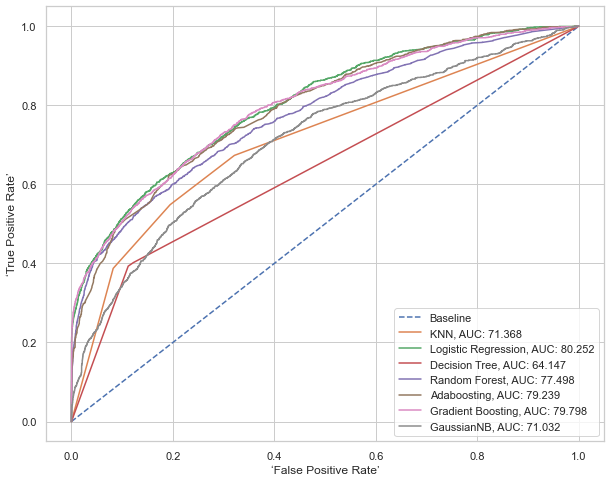

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
# KNN
knn_probs = knn_SMOTE.predict_proba(X_test)[:, 1]
# LR
lr_probs = lr_4x.predict_proba(X_test)[:, 1]
# tree
dtree_probs = dtree_SMOTE.predict_proba(X_test)[:, 1]
# RF
rf_probs = rf_SMOTE.predict_proba(X_test)[:, 1]
# Adaboosting
ada_probs = ada_SMOTE.predict_proba(X_test)[:, 1]
# GB
Gb_probs = gb.predict_proba(X_test)[:, 1]
# NB
NB_probs = Gauss.predict_proba(X_test)[:, 1]
# plot baseline roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
# calculate roc curve for model
fpr1, tpr1, _ = roc_curve(y_test, knn_probs)
fpr2, tpr2, _ = roc_curve(y_test, lr_probs )
fpr3, tpr3, _ = roc_curve(y_test, dtree_probs)
fpr4, tpr4, _ = roc_curve(y_test, rf_probs )
fpr5, tpr5, _ = roc_curve(y_test, ada_probs)
fpr6, tpr6, _ = roc_curve(y_test, Gb_probs)
fpr7, tpr7, _ = roc_curve(y_test, NB_probs)
auc1 = round(100*(roc_auc_score(y_test, knn_probs)), 3)
auc2 = round(100*(roc_auc_score(y_test,lr_probs)), 3)
auc3 = round(100*(roc_auc_score(y_test,dtree_probs)), 3)
auc4 = round(100*(roc_auc_score(y_test, rf_probs)), 3)
auc5 = round(100*(roc_auc_score(y_test, ada_probs)), 3)
auc6 = round(100*(roc_auc_score(y_test, Gb_probs)), 3)
auc7 = round(100*(roc_auc_score(y_test, NB_probs)), 3)
# plot model roc curve
plt.plot(fpr1, tpr1, linestyle='-', label=f'KNN, AUC: {auc1}')
plt.plot(fpr2, tpr2, linestyle='-', label=f'Logistic Regression, AUC: {auc2}')
plt.plot(fpr3, tpr3, linestyle='-', label=f'Decision Tree, AUC: {auc3}')
plt.plot(fpr4, tpr4, linestyle='-', label=f'Random Forest, AUC: {auc4}')
plt.plot(fpr5, tpr5, linestyle='-', label=f'Adaboosting, AUC: {auc5}')
plt.plot(fpr6, tpr6, linestyle='-', label=f'Gradient Boosting, AUC: {auc6}')
plt.plot(fpr7, tpr7, linestyle='-', label=f'GaussianNB, AUC: {auc7}')
# axis labels
plt.xlabel('‘False Positive Rate’')
plt.ylabel('‘True Positive Rate’')
# show the legend
plt.legend()
# show the plot
plt.show()